In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [2]:
# loading wine dataset
data = datasets.load_wine()

input = data.data
output = data.target


In [3]:
data_frame = pd.DataFrame(input,columns=data.feature_names)

print("Wine Datasets :-\n\n")
data_frame

Wine Datasets :-




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
# labelEncoder Object
label_encoder = preprocessing.LabelEncoder()

for data in data_frame:
  data_frame[data] = label_encoder.fit_transform(data_frame[data])
  
print("Encoded Data:-\n\n")
data_frame

Encoded Data:-




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,118,43,44,12,45,73,107,11,87,81,49,120,94
1,65,49,18,1,21,68,91,9,31,56,50,102,92
2,63,71,63,32,22,73,115,13,96,83,48,86,101
3,121,59,49,21,33,95,122,7,84,109,30,104,116
4,67,81,75,45,37,73,89,20,66,53,49,73,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,92,131,46,42,16,23,12,30,22,108,10,22,67
174,76,113,48,51,23,30,19,24,40,104,16,10,68
175,68,119,29,40,39,17,17,24,35,125,6,10,74
176,64,81,38,40,39,22,16,31,45,120,7,14,75


In [5]:
# train test division 66% - 34% because my Roll No is 125
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_frame, output, test_size = 0.34, random_state = 120)

# create model
model = MultinomialNB()
model.fit(X_train, Y_train)

# Predict Y from X_text
Y_predicted = model.predict(X_test)

print(Y_predicted)

[1 1 2 0 1 1 0 0 0 1 2 2 1 1 0 2 2 0 1 1 1 0 0 0 1 2 1 1 0 0 2 2 2 0 0 1 1
 1 2 1 1 2 2 1 0 0 0 0 0 2 1 2 2 0 2 1 0 0 1 1 0]


Accuracy is :- 0.9508196721311475
Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.88      0.94        26
           2       0.88      1.00      0.93        14

    accuracy                           0.95        61
   macro avg       0.94      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61


Confusion matrix:
[[21  0  0]
 [ 1 23  2]
 [ 0  0 14]]


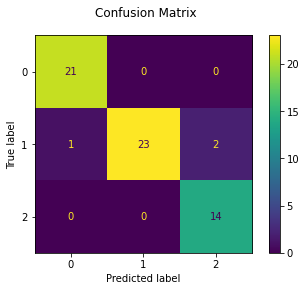

In [6]:
from sklearn import metrics

print(f"Accuracy is :- {metrics.accuracy_score(Y_test, Y_predicted)}")


print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

disp = metrics.plot_confusion_matrix(model, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()